<a href="https://colab.research.google.com/github/NiyonshutiDavid/IntroML-Summative/blob/main/DavidNiyonshuti_notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras import regularizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
#LOAD THE DATA
#data_url = "https://drive.google.com/file/d/1PWL5QBIq4t09V-DOQeIzRnTMYUcPdZks/view?usp=sharing"
data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Plot the Data Appropriately

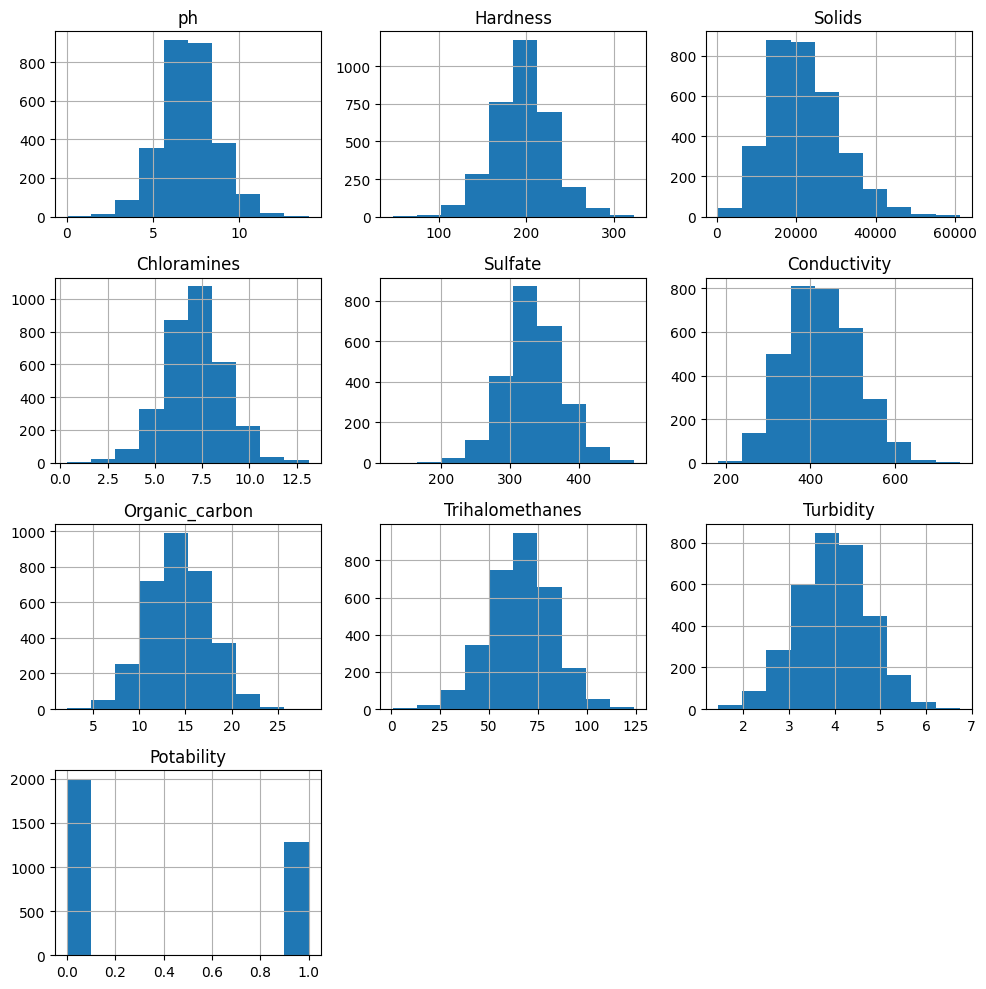

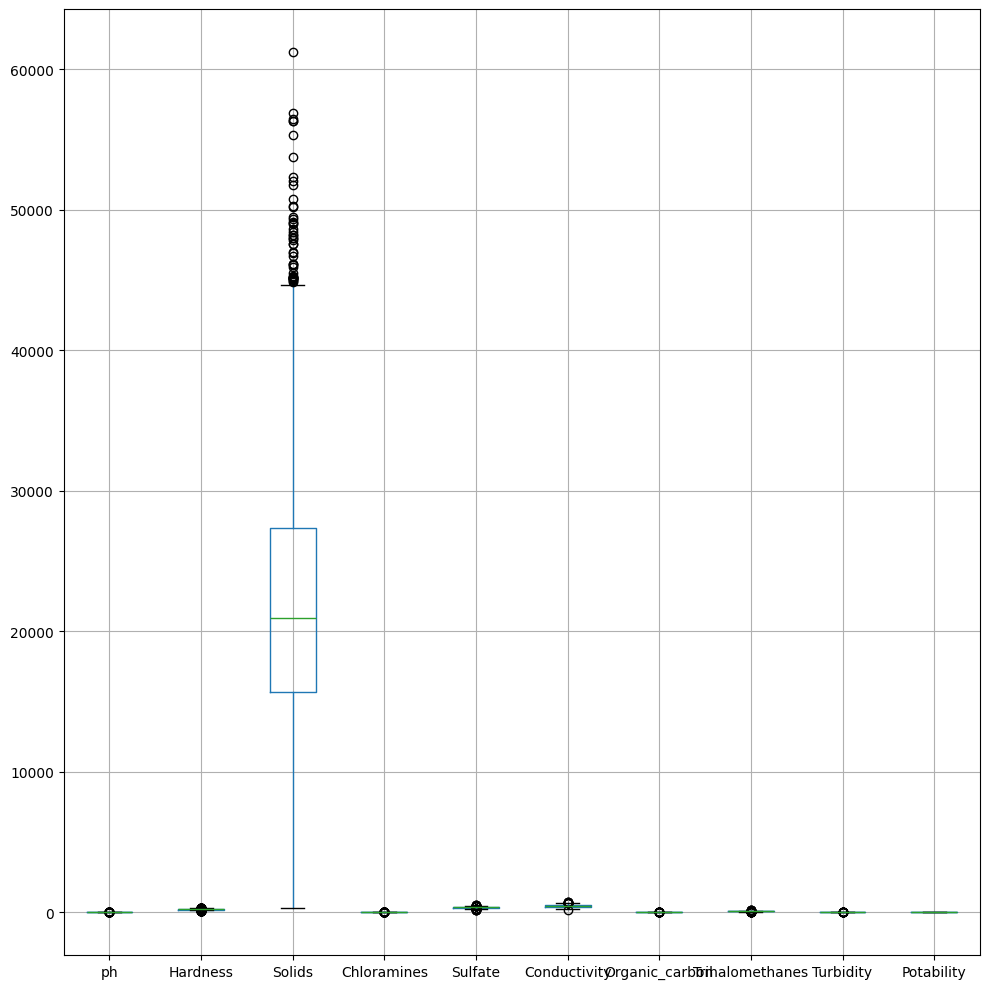

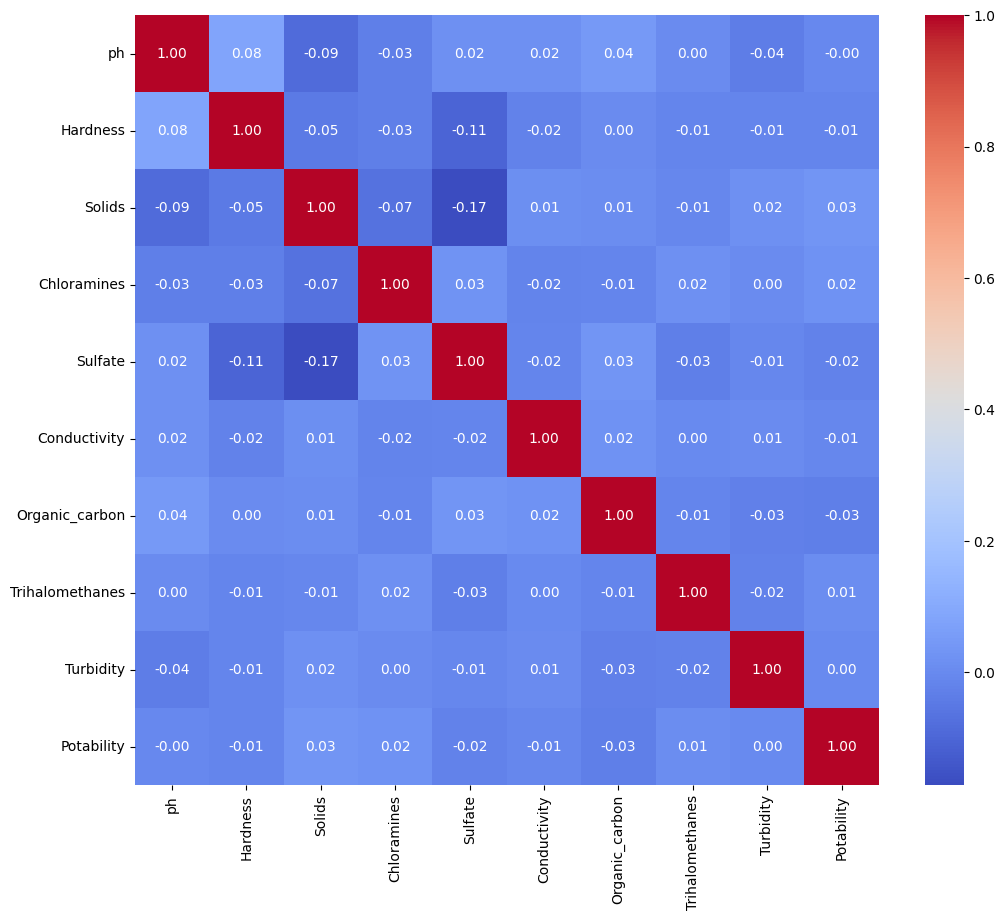

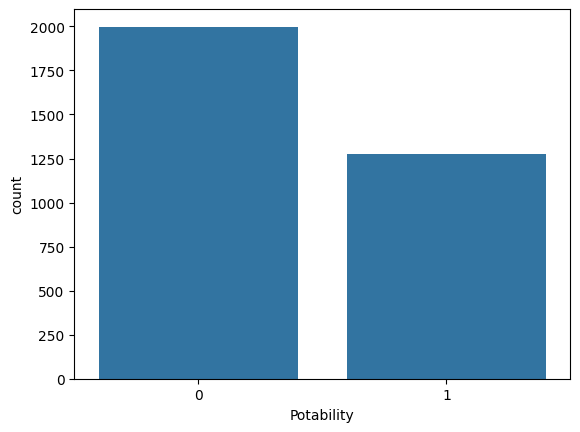

In [5]:
# plot the data

data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

data.boxplot(figsize=(10, 10))
plt.tight_layout()
plt.show()

import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

sns.countplot(x='Potability', data=data)
plt.show()

In [6]:
# show how many missing values and handle them by filling in the mean

print(data.isnull().sum())
data = data.fillna(data.mean())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [7]:
print(data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [8]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [10]:

# generate 2d classification dataset

X= data.drop('Potability', axis=1)
y = data['Potability']


In [34]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
print(X_scaled)
print("Y scaled")
print(y_scaled)

[[-6.04313345e-16  2.59194711e-01 -1.39470871e-01 ... -1.18065057e+00
   1.30614943e+00 -1.28629758e+00]
 [-2.28933938e+00 -2.03641367e+00 -3.85986650e-01 ...  2.70597240e-01
  -6.38479983e-01  6.84217891e-01]
 [ 6.92867789e-01  8.47664833e-01 -2.40047337e-01 ...  7.81116857e-01
   1.50940884e-03 -1.16736546e+00]
 ...
 [ 1.59125368e+00 -6.26829230e-01  1.27080989e+00 ... -9.81329234e-01
   2.18748247e-01 -8.56006782e-01]
 [-1.32951593e+00  1.04135450e+00 -1.14405809e+00 ... -9.42063817e-01
   7.03468419e-01  9.50797383e-01]
 [ 5.40150905e-01 -3.85462310e-02 -5.25811937e-01 ...  5.60940070e-01
   7.80223466e-01 -2.12445866e+00]]
Y scaled
[[-0.79977474]
 [-0.79977474]
 [-0.79977474]
 ...
 [ 1.25035206]
 [ 1.25035206]
 [ 1.25035206]]


In [39]:
# display input shape

print("Input shape: ", X_scaled.shape)
print("Y scaled shape", y_scaled.shape)

Input shape:  (3276, 9)
Y scaled shape (3276, 1)


In [42]:
# Divide the dataset into training, validation, and testing sets using an appropriate ratio (e.g., 70% training, 15% validation, 15% testing).

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42) # 70% training, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 15% validation, 15% testing

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2293, 9) (2293,)
Validation set shape: (491, 9) (491,)
Testing set shape: (492, 9) (492,)


# Each Memeber Defines their model Here

In [43]:
#Model Definition by member
def davidNiyonshuti_model():
    model = Sequential()
    model.add(Dense(62, activation='relu',
                    input_shape=(X_train.shape[1],),
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.3))  # Drop 30% of units randomly

    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    return model


In [44]:
# print the model summary
model = davidNiyonshuti_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 62)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 62)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,669 (10.43 KB)

 Trainable params: 2,669 (10.43 KB)

 Non-trainable params: 0 (0.00 B)

# Start the training Process

In [45]:
# Compile the model
model.compile(optimizer=Adagrad(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [47]:
# Fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5280 - loss: 0.7559 - val_accuracy: 0.5991 - val_loss: 0.7243
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6100 - loss: 0.7152 - val_accuracy: 0.6275 - val_loss: 0.7099
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6415 - loss: 0.6959 - val_accuracy: 0.6318 - val_loss: 0.6942
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6478 - loss: 0.6844 - val_accuracy: 0.6732 - val_loss: 0.6736
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6548 - loss: 0.6809 - val_accuracy: 0.6623 - val_loss: 0.6647
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6601 - loss: 0.6627 - val_accuracy: 0.6536 - val_loss: 0.6714
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6717 - loss: 0.6533 - val_accuracy: 0.6623 - val_loss: 0.6579
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6591 - loss: 0.6482 - val_accuracy: 0.6623 - 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.6127 
Test Loss: 0.6179
Test Accuracy: 0.7012


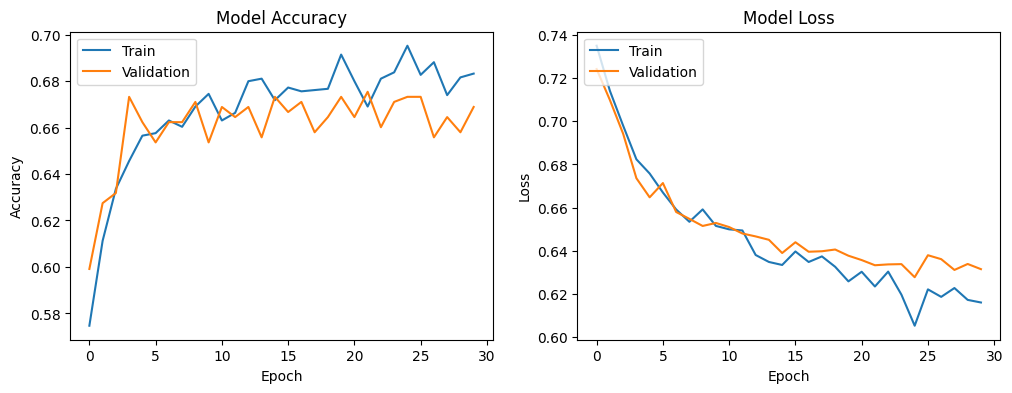

In [48]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


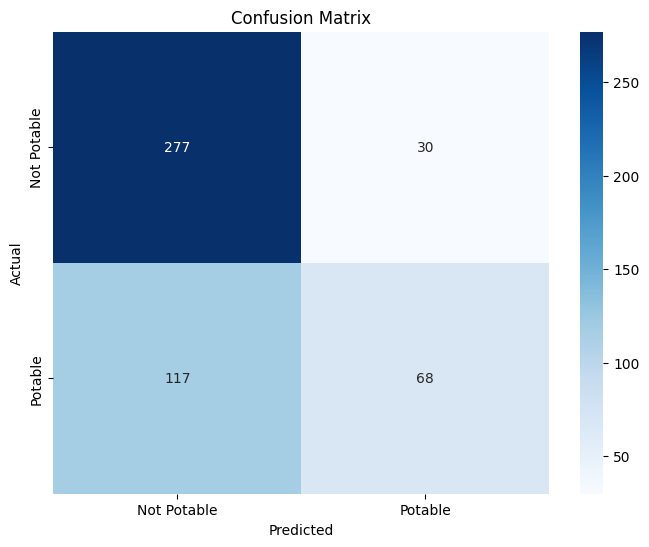


Classification Report:
              precision    recall  f1-score   support

 Not Potable       0.70      0.90      0.79       307
     Potable       0.69      0.37      0.48       185

    accuracy                           0.70       492
   macro avg       0.70      0.63      0.64       492
weighted avg       0.70      0.70      0.67       492



In [49]:
# Confusion matrix (visualized)
# Precision, Recall, F1-score, and Accuracy printed per class

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Potable', 'Potable']))

In [50]:
# model metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print results
print(f"\nResults:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")



Results:
Accuracy: 0.7012
F1 Score: 0.4806
Recall: 0.3676
Precision: 0.6939


In [51]:

# Save the entire model to a single file
model.save('David_Niyonshuti_model.keras')

# Verify the file exists
!ls -l David_Niyonshuti_model.keras

-rw-r--r-- 1 root root 49132 Jun  7 14:11 David_Niyonshuti_model.keras


In [52]:

# Load the saved model
loaded_model = tf.keras.models.load_model('David_Niyonshuti_model.keras')

# Get the first row of the original data (before splitting) for prediction
first_row_data = data.drop('Potability', axis=1).iloc[[0]]

# Predict the single entry point of the first row of data
prediction_proba_first_row = loaded_model.predict(first_row_data)
prediction_first_row = (prediction_proba_first_row > 0.5).astype(int)

print("\nFirst Row of Original Data for Prediction:")
print(first_row_data)
print("\nPrediction Probability for First Row:", prediction_proba_first_row[0][0])
print("Predicted Class for First Row (0: Not Potable, 1: Potable):", prediction_first_row[0][0])
# comparing to the actual potability of the first row
print("Actual Class for First Row:", data['Potability'].iloc[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step

First Row of Original Data for Prediction:
         ph    Hardness  ...  Trihalomethanes  Turbidity
0  7.080795  204.890455  ...         86.99097   2.963135

[1 rows x 9 columns]

Prediction Probability for First Row: 0.0
Predicted Class for First Row (0: Not Potable, 1: Potable): 0
Actual Class for First Row: 0
